### 가우시안 정규분포 (Gaussian Normal Distribution)

- 그냥 정규분포라고 함
- [참고] 데이터 사이언스 스쿨 : https://datascienceschool.net/view-notebook/76acc92d28354e86940001f9fe85c50f/


    정규 분포는 평균  μ 와 분산  σ2  이라는 두 개의 모수만으로 정의되며 확률밀도함수(pdf: probability density function)는 다음과 같은 수식으로 표현된다.

    N(x;μ,σ2)

    정규 분포 중에서도 평균이 0 이고 분산이 1 인 ( μ=0 ,  σ2=1 ) 정규 분포를 표준 정규 분포(standard normal distribution)라고 한다.

    정규 분포의 확률밀도함수는 다음과 같은 성질을 가진다.

    x=μ 일 때 확률밀도가 최대가 된다.
    x=∞ 로 다가가거나  x=−∞ 로 다가갈수록 확률밀도가 작아진다.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

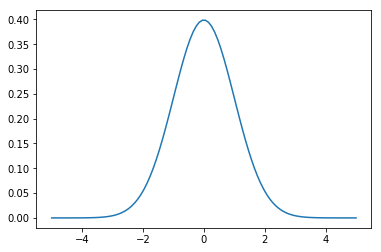

In [2]:
"""scipy를 이용한 정규 분포 시뮬레이션 
        - norm 클래스로 정규분포 객체 생성
        - 평균과 표준편차를 모수로 사용
        - pdf()를 이용하여 밀도 함수 계산
"""
mu = 0   # 평균 0
std = 1  # 표준편차 1
rv = sp.stats.norm( mu, std)

xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

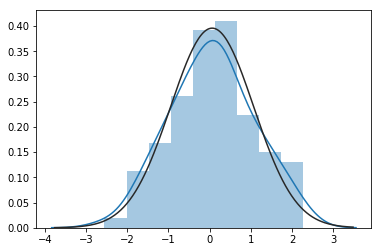

In [6]:
np.random.seed(0)
x = rv.rvs(100)
print(x)

sns.distplot(x, kde=True)  # 파란선은 kde (커널밀도 곡선)
sns.distplot(x, kde=True, fit=sp.stats.norm) #  검정선이 정규분포 곡선

### 통계분석 중의 하나로 정규분포 검정 (normality test)

- Q-Q 플롯 : 정규분포검정을 시각적으로 확인

#### Q-Q 플롯 사용 순서
1. 샘플 데이터를 크기순으로 정렬한다
2. 각 샘플 데이터의 분위함수(Quantile Function) 값을 구한다
3. 각 샘플 데이터의 분위수(quantile)을 구한다
4. 샘플 데이터와 그에 대응한 정규 분포 값을 하나의 쌍으로 생각하고 2차원 공간에 점으로 그린다
5. 모든 샘플에 대해 2-4단계를 반복하여 스캐터 플롯을 생성한다

** scipy 에서는 Q-Q 플롯을 그리기 위해 probplot 이용한다
- [결과] 직선의 형태로 나타나면 정규분포를 따른다
- [결과] 곡선의 형태로 나타나면 정규분포를 따르지 않는다

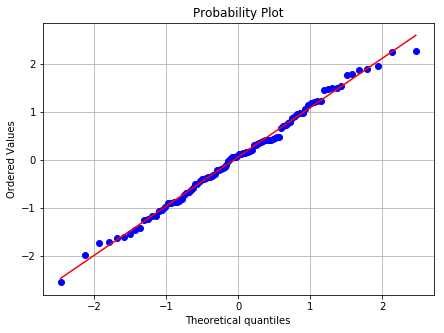

In [8]:
""" (1) 정규 분포를 따르는 데이터 샘플을 Q-Q 플롯으로 그리기 """

np.random.seed(0)
x= np.random.randn(100) # 정규분포를 따르는 데이타 100개의 램덤수

plt.figure(figsize=(7,5))
sp.stats.probplot(x, plot=plt) # plt 객체를 plot으로 지정해야 한다

plt.grid()
# plt.axis('equal') : 그래프를 늘려도 그래프 비율을 유지한다

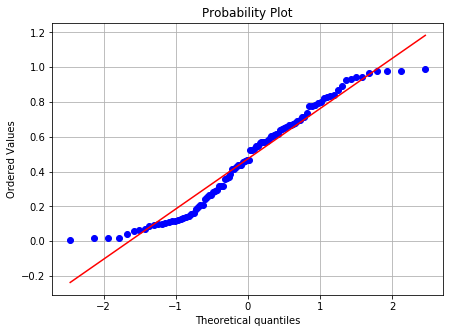

In [9]:
""" (2) 정규 분포를 따르지 않는 데이터 샘플을 Q-Q 플롯으로 그리기 """
np.random.seed(0)
x= np.random.rand(100) # 정규분포가 아닌 균일분포를 따르는 데이타 100개의 램덤수

plt.figure(figsize=(7,5))
sp.stats.probplot(x, plot=plt) # plt 객체를 plot으로 지정해야 한다

plt.grid()